## Illia Tsuprun KA-14mp, IASA, KPI (var 11)
## Course: decision making in hierarchical systems
## Tutor: N.Nedashkivska

# Підвищення узгодженості експертних оцінок в задачах оцінювання альтернатив за одиничним критерієм

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append('python_modules') ## not my libraty, it was stolen. Author: N.Nedashkivska
import findUFOs as ufoFinder
## ufo - unusual and false observations
import checkConsistencyPCM as pcmConsistencyChecker

### Завдання: Знайти викиди в експертних оцінках, використовуючи наступні методи (згідно з варіантом):
- СІ для укороченої МПП,
- кореляції між рядками і стовпчиками МПП,
- метод, що використовує критерій Хі-квадрат,
- метод транзитивностей,
- метод потоків M_OutFlow.

### Порівняти результати, отримані різними методами.

### Задача:<br>

Задача полягає у виборі оптимальної моделі альянсу між банком і<br>
страховими компаніями за критерієм <br>
«майбутні економії у зв’язку із зростанням портфеля послуг».
<br>
Результати парних порівнянь шести моделей наступні:

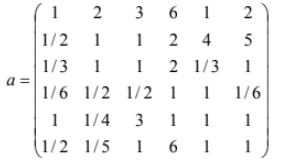

In [2]:
pcm = [
    [1.00, 2.00, 3.00, 6.00, 1.00, 2.00],
    [0.50, 1.00, 1.00, 2.00, 4.00, 5.00],
    [0.33, 1.00, 1.00, 2.00, 0.33, 1.00],
    [0.17, 0.50, 0.50, 1.00, 1.00, 0.17],
    [1.00, 0.25, 0.33, 1.00, 1.00, 1.00],
    [0.50, 0.20, 1.00, 0.17, 1.00, 1.00]
]

In [3]:
def isConsistentPCM(pcm):
    print('PCM is consistent: ', pcmConsistencyChecker.isConsist(pcm))
    print('PCM is weak consistent: ', pcmConsistencyChecker.isWeakConsist(pcm))
    print('PCM is consistent according CR index: ', pcmConsistencyChecker.isConsistCR(pcm))
    print('PCM is consistent according to GCI index: ', pcmConsistencyChecker.isConsistGCI(pcm))
    print('PCM is consistent according to HCR index: ', pcmConsistencyChecker.isConsistHCR(pcm))
    
isConsistentPCM(pcm)

PCM is consistent:  False
PCM is weak consistent:  False
PCM is consistent according CR index:  True
PCM is consistent according to GCI index:  False
PCM is consistent according to HCR index:  True


## 1. СІ для укороченої МПП

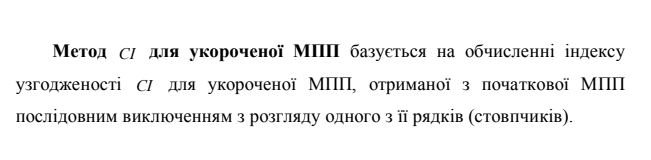

In [4]:
index1, index2 = ufoFinder.findUFO_methodCI(pcm)
print(
    f"""\n
    Значення CI є найменшим коли виключаємо {index1} або {index2} альтернативи, тому 
    найбільш неузгодженим елементом МПП є елемент d{index1}{index2}, 
    а також обернено симетричний до нього. 
    """)

При виключенні альтернативи 0 CI = -0.07253235082289008
При виключенні альтернативи 1 CI = -0.06728145007383467
При виключенні альтернативи 2 CI = 0.06570129578271612
При виключенні альтернативи 3 CI = 0.0732300923379935
При виключенні альтернативи 4 CI = 0.008283961623517171
При виключенні альтернативи 5 CI = 0.05968406729750119


    Значення CI є найменшим коли виключаємо 0 або 1 альтернативи, тому 
    найбільш неузгодженим елементом МПП є елемент d01, 
    а також обернено симетричний до нього. 
    


## 2. Kореляції між рядками і стовпчиками МПП

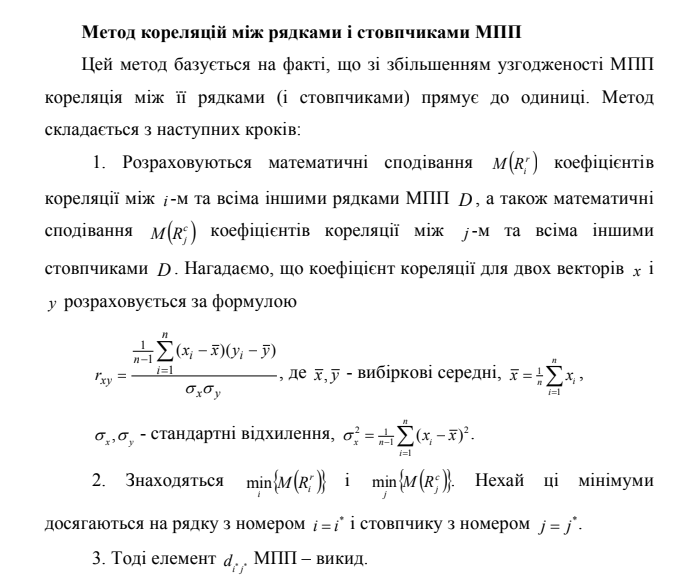


In [5]:
def calculateCorrCoef(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_stddev = np.sqrt(np.sum((x-x_mean)**2) / (n-1))
    y_stddev = np.sqrt(np.sum((y-y_mean)**2) / (n-1))
    coef = (np.sum((x-x_mean)*(y-y_mean)) / (n-1))/(x_stddev*y_stddev)
    return coef

In [6]:
def findUFO_methodCorr(pcm):
    pcm = np.array(pcm)    
    n = len(pcm)
    i_means = []
    j_means = []
    
    for i in range(n):
        corr_coeffs_i = []
        corr_coeffs_j = []
        for j in range(n):
            if i != j:
                corr_coef_i = calculateCorrCoef(pcm[i],  pcm[j])
                corr_coef_j = calculateCorrCoef(pcm[:, i],  pcm[:, j])
                corr_coeffs_i.append(corr_coef_i)
                corr_coeffs_j.append(corr_coef_j)
        i_means.append(np.mean(corr_coeffs_i))
        j_means.append(np.mean(corr_coeffs_j))
    index1 = i_means.index(min(i_means))
    index2 = j_means.index(min(j_means))
    
    return index1, index2

In [7]:
index1, index2 = findUFO_methodCorr(pcm)
print(
    f"""\n
    Значення мат сподівання є найменшим для коєфіцієнтів кореляції між {index1} та всіма іншими рядками МПП.
    Значення мат сподівання є найменшим для коєфіцієнтів кореляції між {index2} та всіма іншими стовбчиками МПП.
    
    Тому, найбільш неузгодженим елементом МПП є елемент d{index1}{index2}, 
    а також обернено симетричний до нього. 
    """)



    Значення мат сподівання є найменшим для коєфіцієнтів кореляції між 5 та всіма іншими рядками МПП.
    Значення мат сподівання є найменшим для коєфіцієнтів кореляції між 4 та всіма іншими стовбчиками МПП.
    
    Тому, найбільш неузгодженим елементом МПП є елемент d54, 
    а також обернено симетричний до нього. 
    


## 3. Метод, що використовує критерій Хі-квадрат

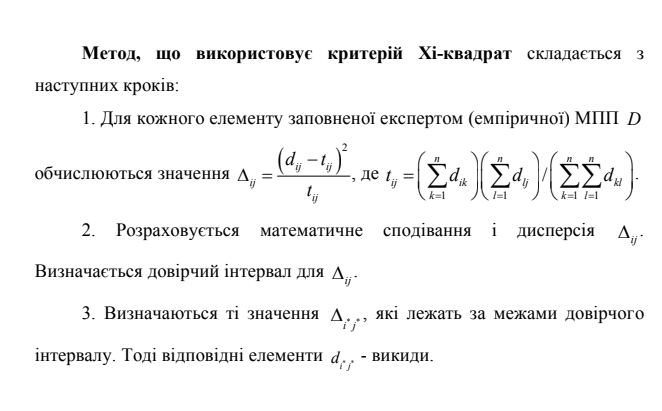

In [8]:
indexes = ufoFinder.findUFO_methodXiSquares(pcm)

In [9]:
print(
    f"""\n
    Элементи {' '.join([f'd{index[0]}{index[1]}' for index in indexes])} лежать за межами довірчого інтервалу,
    а отже є викидами.
    """)



    Элементи d03 d04 d14 d15 d40 d53 лежать за межами довірчого інтервалу,
    а отже є викидами.
    


## 4. Метод транзитивностей

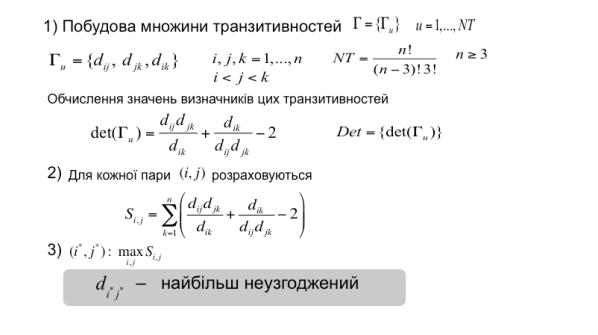

In [10]:
index1, index2 = ufoFinder.findUFO_methodTransitivities(pcm)
print(
    f"""\n
    Найбільш неузгодженим елементом МПП згідно методу транзитивностей
    є елемент d{index1}{index2}, а також обернено симетричний до нього. 
    """)



    Найбільш неузгодженим елементом МПП згідно методу транзитивностей
    є елемент d05, а також обернено симетричний до нього. 
    


## 5. Метод потоків M_OutFlow
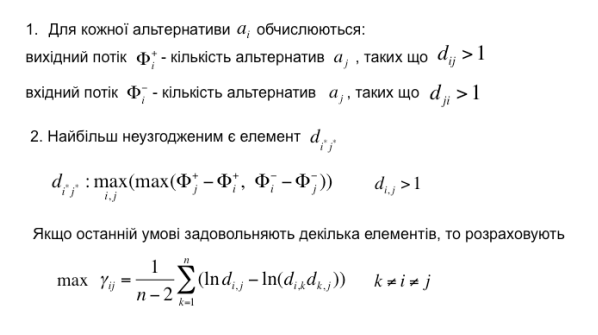

In [11]:
index1, index2 = ufoFinder.findUFO_methodModifiedOutflow(pcm)

print(
    f"""\n
    Найбільш неузгодженим елементом МПП згідно методу M_OutFlow
    є елемент d{index1}{index2}, а також обернено симетричний до нього. 
    """)



    Найбільш неузгодженим елементом МПП згідно методу M_OutFlow
    є елемент d14, а також обернено симетричний до нього. 
    


## Висновок: Було знайдено найбільш неузгоджені елементи МПП кожним з методів. Варто зазначити, що більшість методів давали різні викиди. Проте, викид знайдений методом M_OutFlow також був виявлений методом на основі критерію Хі-квадрат. Це елемент d14, а також обернено симетричний до нього.